In [ ]:
#Uso de librer√≠as. Celda n¬∫1
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import warnings
from collections import defaultdict
from tabulate import tabulate
from google.colab import data_table
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Cargar el archivo Excel
xls = pd.ExcelFile("Test_animales.xlsx")
# Leer las hojas y asignar la nueva variable "degenera"
df_list = []
for i, sheet in enumerate(xls.sheet_names):
    df = xls.parse(sheet)
    df["degenera"] = i  # Asigna 0 a la primera hoja, 1 a la segunda, etc.
    df_list.append(df)

# Unir todas las hojas en un solo DataFrame
df = pd.concat(df_list, ignore_index=True)
# Guardar el resultado en un CSV
df.to_csv("Test_animales.csv", index=False)


data = pd.read_csv("Test_animales.csv", header =2)
# Asignar la primera fila como nombres de columnas
data.columns = data.iloc[0]  # Toma la primera fila como encabezados
data = data[1:].reset_index(drop=True)  # Eliminar la fila duplicada y resetear √≠ndice

# Asegurar que no hay nombres de columna repetidos
data.columns = [str(col) for col in data.columns]
display(data)

Edad sacrificio ID animal Sexo       P30   3m   4m   6m   9m  12m 17-21m  \
0                 1     WT-25    ‚ôÄ  110220-5  NaN  NaN  NaN  NaN  NaN    NaN   
1                 1    WT-110    ‚ôÄ       NaN  NaN  NaN  NaN  NaN  NaN    NaN   
2                 1    WT-111    ‚ôÇ       NaN  NaN  NaN  NaN  NaN  NaN    NaN   
3                 1    WT-112    ‚ôÄ       NaN  NaN  NaN  NaN  NaN  NaN    NaN   
4                 1    WT-113    ‚ôÇ       NaN  NaN  NaN  NaN  NaN  NaN    NaN   
..              ...       ...  ...       ...  ...  ...  ...  ...  ...    ...   
254             P11       R10  NaN       NaN  NaN  NaN  NaN  NaN  NaN    NaN   
255             P11       R11  NaN       NaN  NaN  NaN  NaN  NaN  NaN    NaN   
256             P11       R12  NaN       NaN  NaN  NaN  NaN  NaN  NaN    NaN   
257             P11       R13  NaN       NaN  NaN  NaN  NaN  NaN  NaN    NaN   
258             P11       R14  NaN       NaN  NaN  NaN  NaN  NaN  NaN    NaN   

     ...    OI     OD     OI          F.Optomotor Edad Opto Dato OPT  \
0    ...  19.5  146.7  166.1  2020-02-17 00:00:00      1,3m    0.572   
1    ...   NaN    NaN    NaN                  NaN       NaN      NaN   
2    ...   NaN    NaN    NaN                  NaN       NaN      NaN   
3    ...   NaN    NaN    NaN                  NaN       NaN      NaN   
4    ...   NaN    NaN    NaN                  NaN       NaN      NaN   
..   ...   ...    ...    ...                  ...       ...      ...   
254  ...   NaN    NaN    NaN                  NaN       NaN      NaN   
255  ...   NaN    NaN    NaN                  NaN       NaN      NaN   
256  ...   NaN    NaN    NaN                  NaN       NaN      NaN   
257  ...   NaN    NaN    NaN                  NaN       NaN      NaN   
258  ...   NaN    NaN    NaN                  NaN       NaN      NaN   

                   F.OCT OD (400 um)       OI  0  
0    2020-02-17 00:00:00      52.818  202.818  0  
1                    NaN         NaN      NaN  0  
2                    NaN         NaN      NaN  0  
3                    NaN         NaN      NaN  0  
4                    NaN         NaN      NaN  0  
..                   ...         ...      ... ..  
254                  NaN         NaN      NaN  1  
255                  NaN         NaN      NaN  1  
256                  NaN         NaN      NaN  1  
257                  NaN         NaN      NaN  1  
258                  NaN         NaN      NaN  1  

[259 rows x 25 columns]

In [ ]:
# Contador para cada nombre de columna duplicada
oi_counter = 1
od_counter = 1
new_columns = []

# Renombrar correctamente las columnas duplicadas de OI y OD
for col in data.columns:
    if col.startswith("OI"):
        new_columns.append(f"OI_{oi_counter}")
        oi_counter += 1
    elif col.startswith("OD"):
        new_columns.append(f"OD_{od_counter}")
        od_counter += 1
    elif col.startswith("0"):
        new_columns.append("degenera")
    else:
        new_columns.append(col) # Mantener los dem√°s nombres iguales
# Aplicar los nuevos nombres
data.columns = new_columns
# Mostrar el resultado
print(data.columns)


Index(['Edad sacrificio', 'ID animal', 'Sexo', 'P30', '3m', '4m', '6m', '9m',
       '12m', '17-21m', 'OD_1', 'OI_1', 'OD_2', 'OI_2', 'OD_3', 'OI_3', 'OD_4',
       'OI_4', 'F.Optomotor', 'Edad Opto', 'Dato OPT', 'F.OCT', 'OD_5', 'OI_5',
       'degenera'],
      dtype='object')


In [ ]:
# Contar las instancias de cada valor en "degenera"
conteo = data["degenera"].value_counts()
print(conteo)

degenera
0    131
1    128
Name: count, dtype: int64


In [ ]:
# Contar valores NaN en cada columna
nan_counts = data.isna().sum()
print(tabulate(nan_counts.reset_index(), headers=["Variable", "Cantidad de NaN"], tablefmt="pretty"))

+----+-----------------+-----------------+
|    |    Variable     | Cantidad de NaN |
+----+-----------------+-----------------+
| 0  | Edad sacrificio |        4        |
| 1  |    ID animal    |        1        |
| 2  |      Sexo       |       15        |
| 3  |       P30       |       246       |
| 4  |       3m        |       236       |
| 5  |       4m        |       252       |
| 6  |       6m        |       243       |
| 7  |       9m        |       243       |
| 8  |       12m       |       239       |
| 9  |     17-21m      |       241       |
| 10 |      OD_1       |       180       |
| 11 |      OI_1       |       184       |
| 12 |      OD_2       |       181       |
| 13 |      OI_2       |       184       |
| 14 |      OD_3       |       180       |
| 15 |      OI_3       |       184       |
| 16 |      OD_4       |       181       |
| 17 |      OI_4       |       184       |
| 18 |   F.Optomotor   |       160       |
| 19 |    Edad Opto    |       154       |
| 20 |    D

In [ ]:
# Seleccionar columnas que empiezan con "OI", "OD" o "Dato OPT"
oi_od_columns = [col for col in data.columns if col.startswith("OI") or col.startswith("OD") or col.startswith("Dato OPT")]
# Eliminar filas donde TODAS esas columnas sean NaN (si al menos una tiene valor, la fila se queda)
data = data.dropna(subset=oi_od_columns, how="all").reset_index(drop=True)
data.to_csv("Test_animales.csv", index=False)
display(data)

Edad sacrificio ID animal Sexo       P30   3m   4m   6m   9m  12m  \
0                 1     WT-25    ‚ôÄ  110220-5  NaN  NaN  NaN  NaN  NaN   
1               1.3     WT-23    ‚ôÄ  110220-3  NaN  NaN  NaN  NaN  NaN   
2               1.3     WT-24    ‚ôÄ  110220-4  NaN  NaN  NaN  NaN  NaN   
3               1.3     WT-26    ‚ôÇ  110220-1  NaN  NaN  NaN  NaN  NaN   
4               1.3     WT-27    ‚ôÇ  110220-2  NaN  NaN  NaN  NaN  NaN   
..              ...       ...  ...       ...  ...  ...  ...  ...  ...   
102              19     12120    ‚ôÄ       NaN  NaN  NaN  NaN  NaN  NaN   
103              20     12004    ‚ôÄ       NaN  NaN  NaN  NaN  NaN  NaN   
104              20     12045    ‚ôÇ       NaN  NaN  NaN  NaN  NaN  NaN   
105              20     12046    ‚ôÇ       NaN  NaN  NaN  NaN  NaN  NaN   
106              20     12057    ‚ôÄ       NaN  NaN  NaN  NaN  NaN  NaN   

       17-21m  ...  OI_3   OD_4   OI_4          F.Optomotor Edad Opto  \
0         NaN  ...  19.5  146.7  166.1  2020-02-17 00:00:00      1,3m   
1         NaN  ...  19.9  123.1  135.2  2020-02-17 00:00:00      1,3m   
2         NaN  ...  19.3  184.3  183.7  2020-02-17 00:00:00      1,3m   
3         NaN  ...  18.0  131.8  166.9  2020-02-17 00:00:00      1,3m   
4         NaN  ...  16.5  181.2  142.6  2020-02-17 00:00:00      1,3m   
..        ...  ...   ...    ...    ...                  ...       ...   
102  110521-5  ...     3     52   84,8                  NaN       NaN   
103  190521-2  ...   3,2   63,1   57,1                  NaN       NaN   
104  190521-7  ...     4   93,2     85                  NaN       NaN   
105  190521-6  ...     7   52,5   91,7                  NaN       NaN   
106  190521-9  ...     4     9*   87,6                  NaN       NaN   

    Dato OPT                F.OCT    OD_5     OI_5 degenera  
0      0.572  2020-02-17 00:00:00  52.818  202.818        0  
1      0.574  2020-02-17 00:00:00  47.365  202.364        0  
2      0.594  2020-02-17 00:00:00   54.94  209.455        0  
3      0.550  2020-02-17 00:00:00  57.273  212.909        0  
4      0.616  2020-02-17 00:00:00  51.091  202.545        0  
..       ...                  ...     ...      ...      ...  
102    0,308  2021-04-28 00:00:00     NaN      NaN        1  
103    0,297  2021-04-26 00:00:00     NaN      NaN        1  
104    0,319  2021-04-27 00:00:00     NaN      NaN        1  
105    0,308  2021-04-27 00:00:00     NaN      NaN        1  
106    0,286  2021-04-28 00:00:00     NaN      NaN        1  

[107 rows x 25 columns]

In [ ]:
data.drop('Edad sacrificio',axis =1, inplace =True)
data.drop('F.Optomotor',axis =1, inplace =True)
data.drop('F.OCT',axis =1, inplace =True)
data.drop('ID animal',axis =1, inplace =True)
display(data)

Sexo       P30   3m   4m   6m   9m  12m    17-21m   OD_1   OI_1  ...  \
0      ‚ôÄ  110220-5  NaN  NaN  NaN  NaN  NaN       NaN  224.1  262.1  ...   
1      ‚ôÄ  110220-3  NaN  NaN  NaN  NaN  NaN       NaN  147.6  217.6  ...   
2      ‚ôÄ  110220-4  NaN  NaN  NaN  NaN  NaN       NaN  318.8  291.6  ...   
3      ‚ôÇ  110220-1  NaN  NaN  NaN  NaN  NaN       NaN  206.7  197.6  ...   
4      ‚ôÇ  110220-2  NaN  NaN  NaN  NaN  NaN       NaN  292.1  198.6  ...   
..   ...       ...  ...  ...  ...  ...  ...       ...    ...    ...  ...   
102    ‚ôÄ       NaN  NaN  NaN  NaN  NaN  NaN  110521-5   78,1   72,1  ...   
103    ‚ôÄ       NaN  NaN  NaN  NaN  NaN  NaN  190521-2   65,1   60,8  ...   
104    ‚ôÇ       NaN  NaN  NaN  NaN  NaN  NaN  190521-7   92,2   83,8  ...   
105    ‚ôÇ       NaN  NaN  NaN  NaN  NaN  NaN  190521-6     79  113,1  ...   
106    ‚ôÄ       NaN  NaN  NaN  NaN  NaN  NaN  190521-9     6*   81,9  ...   

      OI_2  OD_3  OI_3   OD_4   OI_4 Edad Opto Dato OPT    OD_5     OI_5  \
0    628.0  16.8  19.5  146.7  166.1      1,3m    0.572  52.818  202.818   
1    501.6  21.6  19.9  123.1  135.2      1,3m    0.574  47.365  202.364   
2    630.5  14.2  19.3  184.3  183.7      1,3m    0.594   54.94  209.455   
3    492.3  14.3  18.0  131.8  166.9      1,3m    0.550  57.273  212.909   
4    470.4  17.5  16.5  181.2  142.6      1,3m    0.616  51.091  202.545   
..     ...   ...   ...    ...    ...       ...      ...     ...      ...   
102  181,2     2     3     52   84,8       NaN    0,308     NaN      NaN   
103  188,7     5   3,2   63,1   57,1       NaN    0,297     NaN      NaN   
104  246,8     3     4   93,2     85       NaN    0,319     NaN      NaN   
105  249,4     5     7   52,5   91,7       NaN    0,308     NaN      NaN   
106  241,3    2*     4     9*   87,6       NaN    0,286     NaN      NaN   

    degenera  
0          0  
1          0  
2          0  
3          0  
4          0  
..       ...  
102        1  
103        1  
104        1  
105        1  
106        1  

[107 rows x 21 columns]

In [ ]:
data["Sexo"] = data["Sexo"].map({"‚ôÄ": 0, "‚ôÇ": 1})
data["Sexo"] = data["Sexo"].fillna(-1).astype(int)
print(data["Sexo"].value_counts())
display(data)

Sexo
 1    56
 0    44
-1     7
Name: count, dtype: int64


Sexo       P30   3m   4m   6m   9m  12m    17-21m   OD_1   OI_1  ...  \
0       0  110220-5  NaN  NaN  NaN  NaN  NaN       NaN  224.1  262.1  ...   
1       0  110220-3  NaN  NaN  NaN  NaN  NaN       NaN  147.6  217.6  ...   
2       0  110220-4  NaN  NaN  NaN  NaN  NaN       NaN  318.8  291.6  ...   
3       1  110220-1  NaN  NaN  NaN  NaN  NaN       NaN  206.7  197.6  ...   
4       1  110220-2  NaN  NaN  NaN  NaN  NaN       NaN  292.1  198.6  ...   
..    ...       ...  ...  ...  ...  ...  ...       ...    ...    ...  ...   
102     0       NaN  NaN  NaN  NaN  NaN  NaN  110521-5   78,1   72,1  ...   
103     0       NaN  NaN  NaN  NaN  NaN  NaN  190521-2   65,1   60,8  ...   
104     1       NaN  NaN  NaN  NaN  NaN  NaN  190521-7   92,2   83,8  ...   
105     1       NaN  NaN  NaN  NaN  NaN  NaN  190521-6     79  113,1  ...   
106     0       NaN  NaN  NaN  NaN  NaN  NaN  190521-9     6*   81,9  ...   

      OI_2  OD_3  OI_3   OD_4   OI_4 Edad Opto Dato OPT    OD_5     OI_5  \
0    628.0  16.8  19.5  146.7  166.1      1,3m    0.572  52.818  202.818   
1    501.6  21.6  19.9  123.1  135.2      1,3m    0.574  47.365  202.364   
2    630.5  14.2  19.3  184.3  183.7      1,3m    0.594   54.94  209.455   
3    492.3  14.3  18.0  131.8  166.9      1,3m    0.550  57.273  212.909   
4    470.4  17.5  16.5  181.2  142.6      1,3m    0.616  51.091  202.545   
..     ...   ...   ...    ...    ...       ...      ...     ...      ...   
102  181,2     2     3     52   84,8       NaN    0,308     NaN      NaN   
103  188,7     5   3,2   63,1   57,1       NaN    0,297     NaN      NaN   
104  246,8     3     4   93,2     85       NaN    0,319     NaN      NaN   
105  249,4     5     7   52,5   91,7       NaN    0,308     NaN      NaN   
106  241,3    2*     4     9*   87,6       NaN    0,286     NaN      NaN   

    degenera  
0          0  
1          0  
2          0  
3          0  
4          0  
..       ...  
102        1  
103        1  
104        1  
105        1  
106        1  

[107 rows x 21 columns]

In [ ]:
data["Edad_ERG"] = np.nan
edad_map = {
    "P30": 1,
    "3m": 3,
    "4m": 4,
    "6m": 6,
    "9m": 9,
    "12m": 12,
    "17-21m": 19
}

for col, val in edad_map.items():
    data.loc[data[col].notna(), "Edad_ERG"] = val

# Normalizar con Min-Max Scaling
min_val = min(edad_map.values())  # M√≠nimo (1)
max_val = max(edad_map.values())  # M√°ximo (19)
data["Edad_ERG"] = (data["Edad_ERG"] - min_val) / (max_val - min_val)
# Crear diccionario con valores normalizados
edad_normalizada = {
    nombre: round((valor - min_val) / (max_val - min_val), 3)
    for nombre, valor in edad_map.items()
}

# Mostrar
for nombre, valor_norm in edad_normalizada.items():
    print(f"{nombre}: {valor_norm}")

display(data[["P30", "3m", "4m", "6m", "9m", "12m", "17-21m", "Edad_ERG"]])

P30: 0.0
3m: 0.111
4m: 0.167
6m: 0.278
9m: 0.444
12m: 0.611
17-21m: 1.0


P30   3m   4m   6m   9m  12m    17-21m  Edad_ERG
0    110220-5  NaN  NaN  NaN  NaN  NaN       NaN       0.0
1    110220-3  NaN  NaN  NaN  NaN  NaN       NaN       0.0
2    110220-4  NaN  NaN  NaN  NaN  NaN       NaN       0.0
3    110220-1  NaN  NaN  NaN  NaN  NaN       NaN       0.0
4    110220-2  NaN  NaN  NaN  NaN  NaN       NaN       0.0
..        ...  ...  ...  ...  ...  ...       ...       ...
102       NaN  NaN  NaN  NaN  NaN  NaN  110521-5       1.0
103       NaN  NaN  NaN  NaN  NaN  NaN  190521-2       1.0
104       NaN  NaN  NaN  NaN  NaN  NaN  190521-7       1.0
105       NaN  NaN  NaN  NaN  NaN  NaN  190521-6       1.0
106       NaN  NaN  NaN  NaN  NaN  NaN  190521-9       1.0

[107 rows x 8 columns]

In [ ]:
data = data.drop(columns=["P30", "3m", "4m", "6m", "9m", "12m", "17-21m"])
display(data)

Sexo   OD_1   OI_1   OD_2   OI_2  OD_3  OI_3   OD_4   OI_4 Edad Opto  \
0       0  224.1  262.1  540.4  628.0  16.8  19.5  146.7  166.1      1,3m   
1       0  147.6  217.6  320.6  501.6  21.6  19.9  123.1  135.2      1,3m   
2       0  318.8  291.6  719.6  630.5  14.2  19.3  184.3  183.7      1,3m   
3       1  206.7  197.6  527.3  492.3  14.3  18.0  131.8  166.9      1,3m   
4       1  292.1  198.6  696.6  470.4  17.5  16.5  181.2  142.6      1,3m   
..    ...    ...    ...    ...    ...   ...   ...    ...    ...       ...   
102     0   78,1   72,1  174,8  181,2     2     3     52   84,8       NaN   
103     0   65,1   60,8  199,9  188,7     5   3,2   63,1   57,1       NaN   
104     1   92,2   83,8  264,3  246,8     3     4   93,2     85       NaN   
105     1     79  113,1  191,6  249,4     5     7   52,5   91,7       NaN   
106     0     6*   81,9    37*  241,3    2*     4     9*   87,6       NaN   

    Dato OPT    OD_5     OI_5  degenera  Edad_ERG  
0      0.572  52.818  202.818         0       0.0  
1      0.574  47.365  202.364         0       0.0  
2      0.594   54.94  209.455         0       0.0  
3      0.550  57.273  212.909         0       0.0  
4      0.616  51.091  202.545         0       0.0  
..       ...     ...      ...       ...       ...  
102    0,308     NaN      NaN         1       1.0  
103    0,297     NaN      NaN         1       1.0  
104    0,319     NaN      NaN         1       1.0  
105    0,308     NaN      NaN         1       1.0  
106    0,286     NaN      NaN         1       1.0  

[107 rows x 15 columns]

In [ ]:
data = data.drop_duplicates()
data = data.reset_index(drop=True)
display(data)

Sexo   OD_1   OI_1   OD_2   OI_2  OD_3  OI_3   OD_4   OI_4 Edad Opto  \
0       0  224.1  262.1  540.4  628.0  16.8  19.5  146.7  166.1      1,3m   
1       0  147.6  217.6  320.6  501.6  21.6  19.9  123.1  135.2      1,3m   
2       0  318.8  291.6  719.6  630.5  14.2  19.3  184.3  183.7      1,3m   
3       1  206.7  197.6  527.3  492.3  14.3  18.0  131.8  166.9      1,3m   
4       1  292.1  198.6  696.6  470.4  17.5  16.5  181.2  142.6      1,3m   
..    ...    ...    ...    ...    ...   ...   ...    ...    ...       ...   
102     0   78,1   72,1  174,8  181,2     2     3     52   84,8       NaN   
103     0   65,1   60,8  199,9  188,7     5   3,2   63,1   57,1       NaN   
104     1   92,2   83,8  264,3  246,8     3     4   93,2     85       NaN   
105     1     79  113,1  191,6  249,4     5     7   52,5   91,7       NaN   
106     0     6*   81,9    37*  241,3    2*     4     9*   87,6       NaN   

    Dato OPT    OD_5     OI_5  degenera  Edad_ERG  
0      0.572  52.818  202.818         0       0.0  
1      0.574  47.365  202.364         0       0.0  
2      0.594   54.94  209.455         0       0.0  
3      0.550  57.273  212.909         0       0.0  
4      0.616  51.091  202.545         0       0.0  
..       ...     ...      ...       ...       ...  
102    0,308     NaN      NaN         1       1.0  
103    0,297     NaN      NaN         1       1.0  
104    0,319     NaN      NaN         1       1.0  
105    0,308     NaN      NaN         1       1.0  
106    0,286     NaN      NaN         1       1.0  

[107 rows x 15 columns]

In [ ]:
data = data.drop(index=[47,48, 49])
data = data.reset_index(drop=True)
data = data.replace({'\*': ''}, regex=True)
data = data.replace({'m': '', 'M': ''}, regex=True)
data = data.replace({',': '.'}, regex=True)
display(data)

Sexo   OD_1   OI_1   OD_2   OI_2  OD_3  OI_3   OD_4   OI_4 Edad Opto  \
0       0  224.1  262.1  540.4  628.0  16.8  19.5  146.7  166.1       1.3   
1       0  147.6  217.6  320.6  501.6  21.6  19.9  123.1  135.2       1.3   
2       0  318.8  291.6  719.6  630.5  14.2  19.3  184.3  183.7       1.3   
3       1  206.7  197.6  527.3  492.3  14.3  18.0  131.8  166.9       1.3   
4       1  292.1  198.6  696.6  470.4  17.5  16.5  181.2  142.6       1.3   
..    ...    ...    ...    ...    ...   ...   ...    ...    ...       ...   
99      0   78.1   72.1  174.8  181.2     2     3     52   84.8       NaN   
100     0   65.1   60.8  199.9  188.7     5   3.2   63.1   57.1       NaN   
101     1   92.2   83.8  264.3  246.8     3     4   93.2     85       NaN   
102     1     79  113.1  191.6  249.4     5     7   52.5   91.7       NaN   
103     0      6   81.9     37  241.3     2     4      9   87.6       NaN   

    Dato OPT    OD_5     OI_5  degenera  Edad_ERG  
0      0.572  52.818  202.818         0       0.0  
1      0.574  47.365  202.364         0       0.0  
2      0.594   54.94  209.455         0       0.0  
3      0.550  57.273  212.909         0       0.0  
4      0.616  51.091  202.545         0       0.0  
..       ...     ...      ...       ...       ...  
99     0.308     NaN      NaN         1       1.0  
100    0.297     NaN      NaN         1       1.0  
101    0.319     NaN      NaN         1       1.0  
102    0.308     NaN      NaN         1       1.0  
103    0.286     NaN      NaN         1       1.0  

[104 rows x 15 columns]

In [ ]:
# Contar las instancias de cada valor en "degenera"
conteo = data["degenera"].value_counts()
print(conteo)

degenera
1    57
0    47
Name: count, dtype: int64


In [ ]:
# Reemplazar "-" y "?" por NaN
data.replace({"-": np.nan, "?": np.nan}, inplace=True)
# Lista de columnas a verificar
columnas_verificar = ["OD_1", "OI_1", "OD_2", "OI_2", "OD_3", "OI_3", "OD_4", "OI_4","OD_5","OI_5","Edad Opto","Dato OPT"]
# Eliminar filas donde TODAS estas columnas sean NaN
data = data.dropna(subset=columnas_verificar, how='all')

# Convert only those
data = data.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
# Verificar que todo es int
print(data.dtypes)
display(data)
data.to_csv("Test_animales.csv", index=False)

Sexo         float64
OD_1         float64
OI_1         float64
OD_2         float64
OI_2         float64
OD_3         float64
OI_3         float64
OD_4         float64
OI_4         float64
Edad Opto    float64
Dato OPT     float64
OD_5         float64
OI_5         float64
degenera     float64
Edad_ERG     float64
dtype: object


Sexo   OD_1   OI_1   OD_2   OI_2  OD_3  OI_3   OD_4   OI_4  Edad Opto  \
0     0.0  224.1  262.1  540.4  628.0  16.8  19.5  146.7  166.1        1.3   
1     0.0  147.6  217.6  320.6  501.6  21.6  19.9  123.1  135.2        1.3   
2     0.0  318.8  291.6  719.6  630.5  14.2  19.3  184.3  183.7        1.3   
3     1.0  206.7  197.6  527.3  492.3  14.3  18.0  131.8  166.9        1.3   
4     1.0  292.1  198.6  696.6  470.4  17.5  16.5  181.2  142.6        1.3   
..    ...    ...    ...    ...    ...   ...   ...    ...    ...        ...   
99    0.0   78.1   72.1  174.8  181.2   2.0   3.0   52.0   84.8        0.0   
100   0.0   65.1   60.8  199.9  188.7   5.0   3.2   63.1   57.1        0.0   
101   1.0   92.2   83.8  264.3  246.8   3.0   4.0   93.2   85.0        0.0   
102   1.0   79.0  113.1  191.6  249.4   5.0   7.0   52.5   91.7        0.0   
103   0.0    6.0   81.9   37.0  241.3   2.0   4.0    9.0   87.6        0.0   

     Dato OPT    OD_5     OI_5  degenera  Edad_ERG  
0       0.572  52.818  202.818       0.0       0.0  
1       0.574  47.365  202.364       0.0       0.0  
2       0.594  54.940  209.455       0.0       0.0  
3       0.550  57.273  212.909       0.0       0.0  
4       0.616  51.091  202.545       0.0       0.0  
..        ...     ...      ...       ...       ...  
99      0.308   0.000    0.000       1.0       1.0  
100     0.297   0.000    0.000       1.0       1.0  
101     0.319   0.000    0.000       1.0       1.0  
102     0.308   0.000    0.000       1.0       1.0  
103     0.286   0.000    0.000       1.0       1.0  

[104 rows x 15 columns]

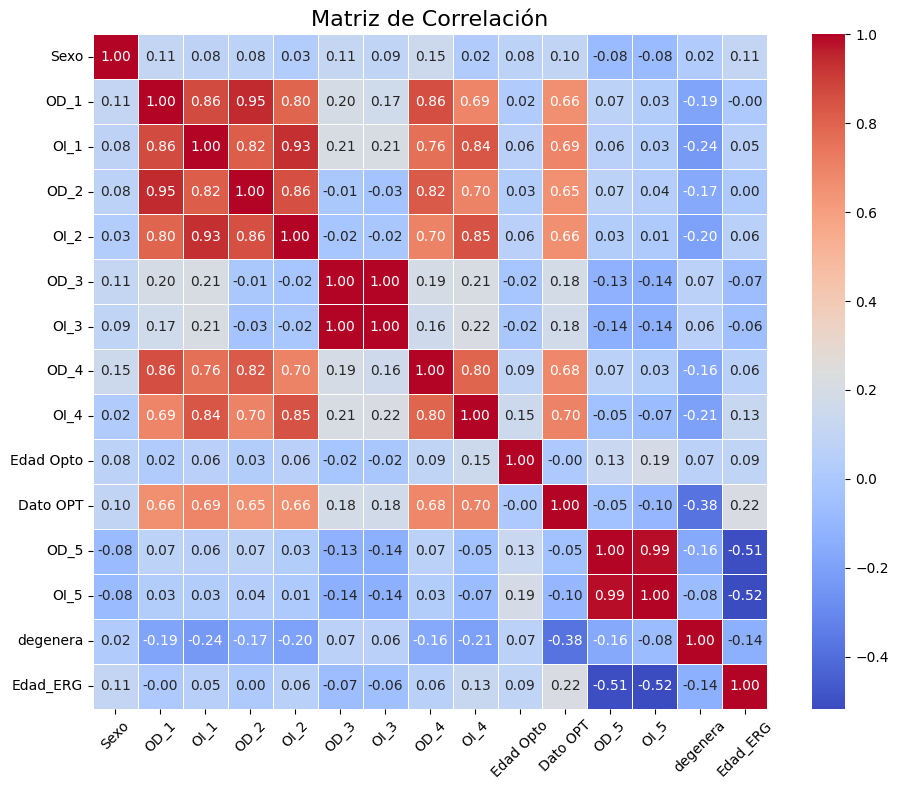

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de correlaci√≥n
correlation_matrix = data.corr(numeric_only=True)

# Mostrar la matriz de correlaci√≥n con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Matriz de Correlaci√≥n", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Definir caracter√≠sticas (X) y variable objetivo (y)
X = data.drop(columns=['degenera'])  # Eliminar la columna objetivo
y = data['degenera']  # Variable objetivo
# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Escalar los datos (solo para modelos que lo necesitan)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print( X_train_scaled)
display (data)

[[-0.77990776 -1.1594742  -1.19428214 ...  0.97345399  0.8173628
  -0.9169251 ]
 [-0.77990776  0.43941929  0.64115237 ...  0.98278454  0.77538424
   0.42118098]
 [-2.48339049 -1.1594742  -1.19428214 ...  0.25030397  0.50791938
  -0.9169251 ]
 ...
 [ 0.92357497 -0.31143279  0.19240886 ...  0.06654985  0.34977229
   0.92297076]
 [ 0.92357497  1.04663759  0.9924229  ...  0.70575576  0.71193857
  -0.9169251 ]
 [ 0.92357497 -0.48000897 -0.15426389 ... -1.48373544 -1.51763681
   2.09381357]]


Sexo   OD_1   OI_1   OD_2   OI_2  OD_3  OI_3   OD_4   OI_4  Edad Opto  \
0     0.0  224.1  262.1  540.4  628.0  16.8  19.5  146.7  166.1        1.3   
1     0.0  147.6  217.6  320.6  501.6  21.6  19.9  123.1  135.2        1.3   
2     0.0  318.8  291.6  719.6  630.5  14.2  19.3  184.3  183.7        1.3   
3     1.0  206.7  197.6  527.3  492.3  14.3  18.0  131.8  166.9        1.3   
4     1.0  292.1  198.6  696.6  470.4  17.5  16.5  181.2  142.6        1.3   
..    ...    ...    ...    ...    ...   ...   ...    ...    ...        ...   
99    0.0   78.1   72.1  174.8  181.2   2.0   3.0   52.0   84.8        0.0   
100   0.0   65.1   60.8  199.9  188.7   5.0   3.2   63.1   57.1        0.0   
101   1.0   92.2   83.8  264.3  246.8   3.0   4.0   93.2   85.0        0.0   
102   1.0   79.0  113.1  191.6  249.4   5.0   7.0   52.5   91.7        0.0   
103   0.0    6.0   81.9   37.0  241.3   2.0   4.0    9.0   87.6        0.0   

     Dato OPT    OD_5     OI_5  degenera  Edad_ERG  
0       0.572  52.818  202.818       0.0       0.0  
1       0.574  47.365  202.364       0.0       0.0  
2       0.594  54.940  209.455       0.0       0.0  
3       0.550  57.273  212.909       0.0       0.0  
4       0.616  51.091  202.545       0.0       0.0  
..        ...     ...      ...       ...       ...  
99      0.308   0.000    0.000       1.0       1.0  
100     0.297   0.000    0.000       1.0       1.0  
101     0.319   0.000    0.000       1.0       1.0  
102     0.308   0.000    0.000       1.0       1.0  
103     0.286   0.000    0.000       1.0       1.0  

[104 rows x 15 columns]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Escalado de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Random Forest (sin bootstrap)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# SVM (usa los datos escalados)
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# XGBoost
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Modelo 1: Red Neuronal Densa (MLP)
model_mlp = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar MLP sin bootstrap
model_mlp.fit(X_train_scaled, y_train,
              epochs=50, batch_size=8,
              validation_data=(X_test_scaled, y_test),
              callbacks=[early_stopping])

# Modelo 2: Red Neuronal Profunda (DNN)
model_dnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model_dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar DNN sin bootstrap
model_dnn.fit(X_train_scaled, y_train,
              epochs=100, batch_size=8,
              validation_data=(X_test_scaled, y_test),
              callbacks=[early_stopping])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 49ms/step - accuracy: 0.5302 - loss: 0.6810 - val_accuracy: 0.5714 - val_loss: 0.6805
Epoch 2/50
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 35ms/step - accuracy: 0.5983 - loss: 0.6688 - val_accuracy: 0.7143 - val_loss: 0.6704
Epoch 3/50
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 35ms/step - accuracy: 0.5415 - loss: 0.6805 - val_accuracy: 0.6667 - val_loss: 0.6638
Epoch 4/50
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 23ms/step - accuracy: 0.5614 - loss: 0.6618 - val_accuracy: 0.6667 - val_loss: 0.6458
Epoch 5/50
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 39ms/step - accuracy: 0.7035 - loss: 0.6180 - val_accuracy: 0.7143 - val_loss: 0.6287
Epoch 6/50
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 43ms/step - accuracy: 0.6783 - loss: 0.5706 - val_accuracy: 0.7143 - val_loss: 0.622

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 30ms/step - accuracy: 0.5017 - loss: 0.7202 - val_accuracy: 0.5238 - val_loss: 0.6969
Epoch 2/100
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - accuracy: 0.4941 - loss: 0.6939 - val_accuracy: 0.5714 - val_loss: 0.6861
Epoch 3/100
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 13ms/step - accuracy: 0.4991 - loss: 0.6608 - val_accuracy: 0.7143 - val_loss: 0.6693
Epoch 4/100
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - accuracy: 0.6368 - loss: 0.6504 - val_accuracy: 0.7619 - val_loss: 0.6558
Epoch 5/100
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 10ms/step - accuracy: 0.6949 - loss: 0.6132 - val_accuracy: 0.8095 - val_loss: 0.6484
Epoch 6/100
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - accuracy: 0.7319 - loss: 0.5754 - val_accuracy: 0.7619 - val_loss: 0.6485
Epoch 7

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 68ms/step
üîπ Modelo: Red Neuronal 1 (DL)
‚úÖ Accuracy: 0.4286
‚úÖ F1-Score: 0.6000

üîπ Clasificaci√≥n detallada:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        10
         1.0       0.47      0.82      0.60        11

    accuracy                           0.43        21
   macro avg       0.24      0.41      0.30        21
weighted avg       0.25      0.43      0.31        21



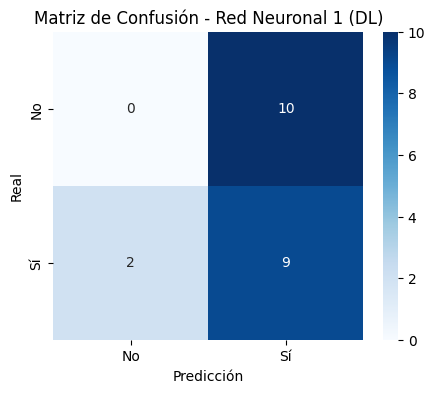

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 75ms/step
üîπ Modelo: Red Neuronal 2 (DL)
‚úÖ Accuracy: 0.5238
‚úÖ F1-Score: 0.6875

üîπ Clasificaci√≥n detallada:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        10
         1.0       0.52      1.00      0.69        11

    accuracy                           0.52        21
   macro avg       0.26      0.50      0.34        21
weighted avg       0.27      0.52      0.36        21



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


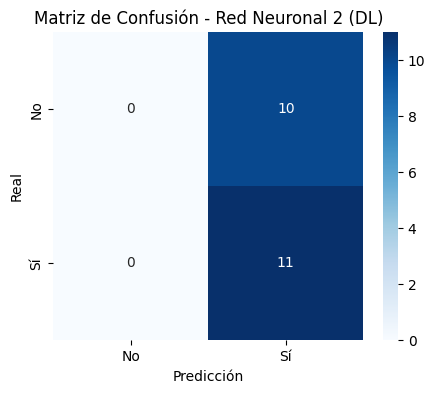

üîπ Modelo: Random Forest (ML)
‚úÖ Accuracy: 1.0000
‚úÖ F1-Score: 1.0000

üîπ Clasificaci√≥n detallada:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00        11

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



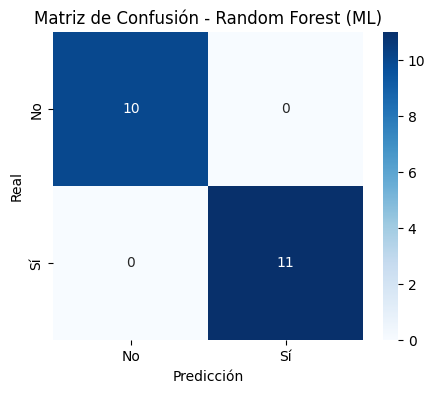

üîπ Modelo: SVM (ML)
‚úÖ Accuracy: 0.5238
‚úÖ F1-Score: 0.6875

üîπ Clasificaci√≥n detallada:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        10
         1.0       0.52      1.00      0.69        11

    accuracy                           0.52        21
   macro avg       0.26      0.50      0.34        21
weighted avg       0.27      0.52      0.36        21



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

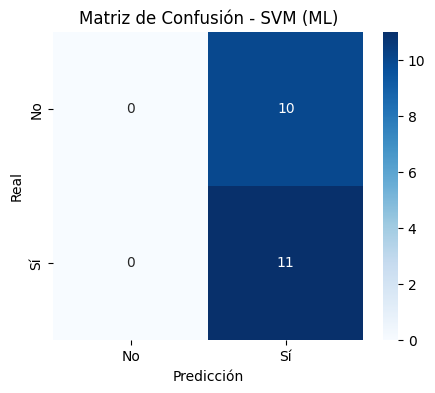

üîπ Modelo: XGBoost (Black Box)
‚úÖ Accuracy: 0.9048
‚úÖ F1-Score: 0.9167

üîπ Clasificaci√≥n detallada:
               precision    recall  f1-score   support

         0.0       1.00      0.80      0.89        10
         1.0       0.85      1.00      0.92        11

    accuracy                           0.90        21
   macro avg       0.92      0.90      0.90        21
weighted avg       0.92      0.90      0.90        21



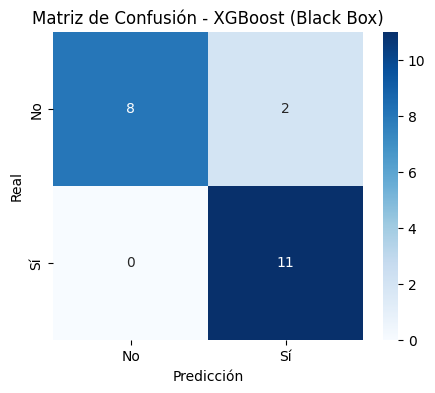

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Funci√≥n para evaluar modelos
def evaluar_modelo(nombre, modelo, X_test, y_test):
    # Obtener las predicciones
    if hasattr(modelo, 'predict_proba'):  # Modelos que devuelven probabilidades (e.g. RandomForest, SVM, XGBoost)
        y_pred_prob = modelo.predict_proba(X_test)[:, 1]  # Extraemos las probabilidades de la clase positiva
        y_pred = (y_pred_prob > 0.5).astype(int)  # Convertimos las probabilidades a clases binarias
    else:  # Modelos que devuelven clases directamente (e.g. MLP, DNN)
        y_pred = modelo.predict(X_test)
        if y_pred.ndim > 1:  # Si el modelo devuelve un array 2D, extraemos la clase
            y_pred = (y_pred[:, 0] > 0.5).astype(int)

    # Calcular las m√©tricas de evaluaci√≥n
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    matriz_conf = confusion_matrix(y_test, y_pred)

    # Mostrar resultados
    print(f"üîπ Modelo: {nombre}")
    print(f"‚úÖ Accuracy: {acc:.4f}")
    print(f"‚úÖ F1-Score: {f1:.4f}")
    print("\nüîπ Clasificaci√≥n detallada:\n", classification_report(y_test, y_pred))

    # Graficar la matriz de confusi√≥n
    plt.figure(figsize=(5, 4))
    sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "S√≠"], yticklabels=["No", "S√≠"])
    plt.xlabel("Predicci√≥n")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusi√≥n - {nombre}")
    plt.show()

# Evaluar todos los modelos
modelos = {
    "Red Neuronal 1 (DL)": model_mlp,
    "Red Neuronal 2 (DL)": model_dnn,
    "Random Forest (ML)": rf,
    "SVM (ML)": svm,
    "XGBoost (Black Box)": xgb
}

# Evaluar cada modelo
for nombre, modelo in modelos.items():
    evaluar_modelo(nombre, modelo, X_test, y_test)


In [1]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Funci√≥n para evaluar modelos con selecci√≥n autom√°tica de datos escalados o no
def evaluar_modelo(nombre, modelo, X_test, X_test_scaled, y_test):
    # Elegir qu√© datos usar seg√∫n el tipo de modelo
    if nombre in ["SVM (ML)", "Red Neuronal 1 (DL)", "Red Neuronal 2 (DL)"]:
        X = X_test_scaled
    else:
        X = X_test

    # Obtener las predicciones
    if hasattr(modelo, 'predict_proba'):
        y_pred_prob = modelo.predict_proba(X)[:, 1]
        y_pred = (y_pred_prob > 0.5).astype(int)
    else:
        y_pred = modelo.predict(X)
        if y_pred.ndim > 1:
            y_pred = (y_pred[:, 0] > 0.5).astype(int)

    # Calcular m√©tricas
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    matriz_conf = confusion_matrix(y_test, y_pred)

    # Mostrar resultados
    print(f"üîπ Modelo: {nombre}")
    print(f"‚úÖ Accuracy: {acc:.4f}")
    print(f"‚úÖ F1-Score: {f1:.4f}")
    print("\nüîπ Clasificaci√≥n detallada:\n", classification_report(y_test, y_pred))

    # Graficar matriz de confusi√≥n
    plt.figure(figsize=(5, 4))
    sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "S√≠"], yticklabels=["No", "S√≠"])
    plt.xlabel("Predicci√≥n")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusi√≥n - {nombre}")
    plt.show()


In [ ]:
# Evaluar todos los modelos con decisi√≥n interna del tipo de datos
modelos = {
    "Red Neuronal 1 (DL)": model_mlp,
    "Red Neuronal 2 (DL)": model_dnn,
    "Random Forest (ML)": rf,
    "SVM (ML)": svm,
    "XGBoost (Black Box)": xgb
}

for nombre, modelo in modelos.items():
    evaluar_modelo(nombre, modelo, X_test, X_test_scaled, y_test)
